# Lab 3
### Averaging Filters

http://scikit-image.org/docs/0.13.x/api/skimage.util.html#skimage.util.random_noise

http://scikit-image.org/docs/dev/api/skimage.filters.html#skimage.filters.median

http://scikit-image.org/docs/dev/api/skimage.filters.html#skimage.filters.gaussian

In [7]:
from commonfunctions import *
import math

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


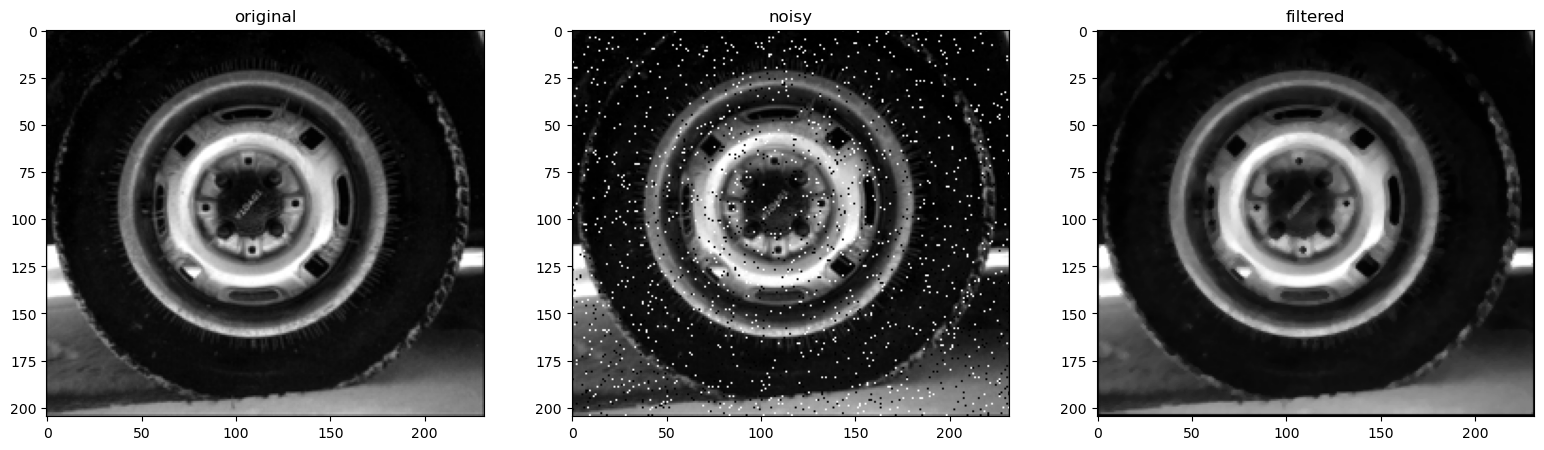

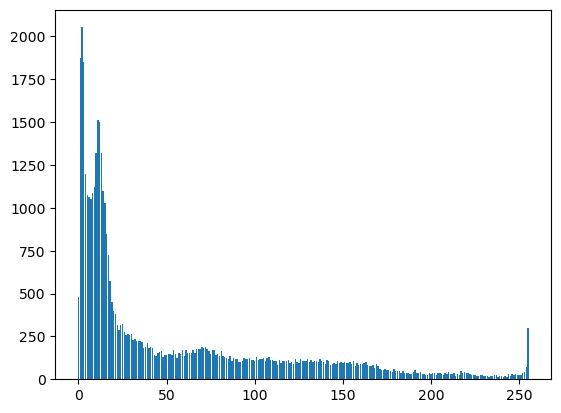

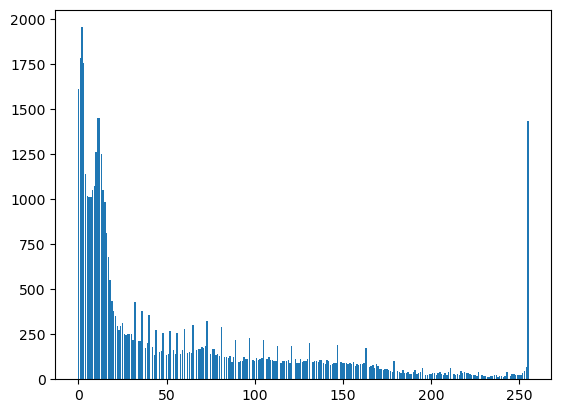

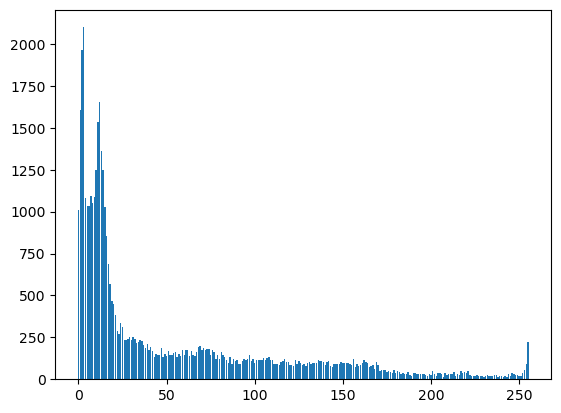

In [8]:
'''
(1) Your own median filter algorithm
'''
def median_filter(img, window_size):
    edgex = window_size[1] // 2
    edgey = window_size[0] // 2
    filtered_img = np.zeros_like(img)
    
    for x in range(edgex, img.shape[1] - edgex):
        for y in range(edgey, img.shape[0] - edgey):
            color_array = []
            for fx in range(window_size[1]):
                for fy in range(window_size[0]):
                    color_array.append(img[y + fy - edgey, x + fx - edgex])
            
            color_array.sort()
            median_value = color_array[len(color_array) // 2]
            
            filtered_img[y, x] = median_value
    
    return filtered_img


original_img = io.imread('tire.tif')
noisy_img = (random_noise(original_img, mode='s&p', amount=0.05) * 255).astype(np.uint8)
filtered_img = median_filter(original_img, [3, 3])
show_images([original_img, noisy_img, filtered_img], ['original', 'noisy', 'filtered'])

showHist(original_img)
showHist(noisy_img)
showHist(filtered_img)

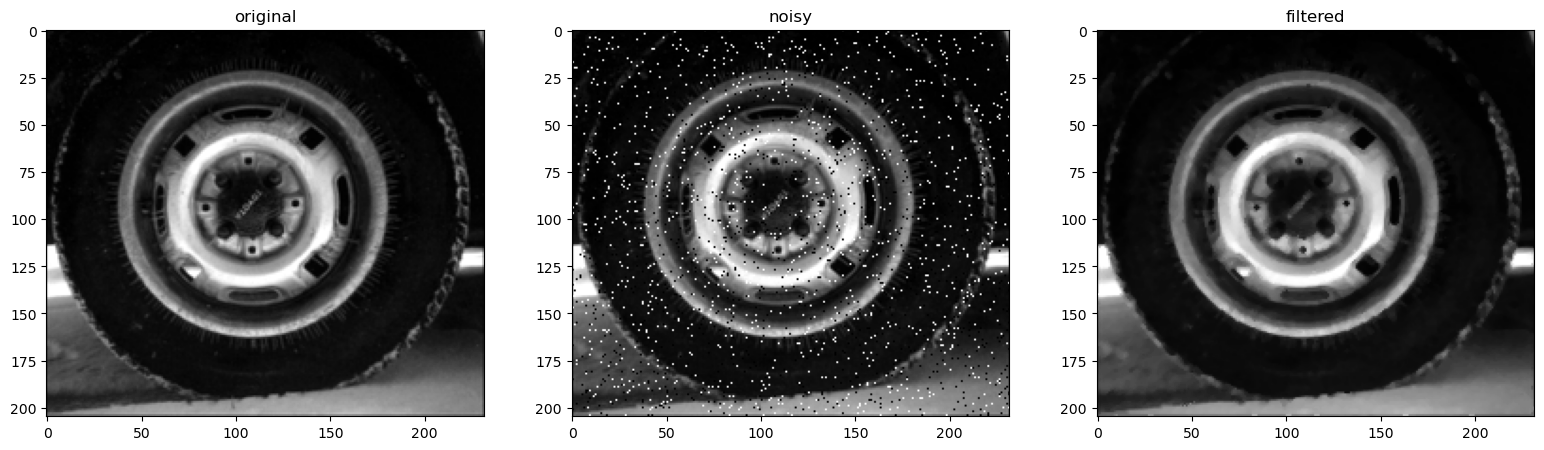

In [9]:
'''
(2) skimage median filter
'''
filtered_img2 = median(noisy_img)
show_images([original_img, noisy_img, filtered_img2], ['original', 'noisy', 'filtered'])

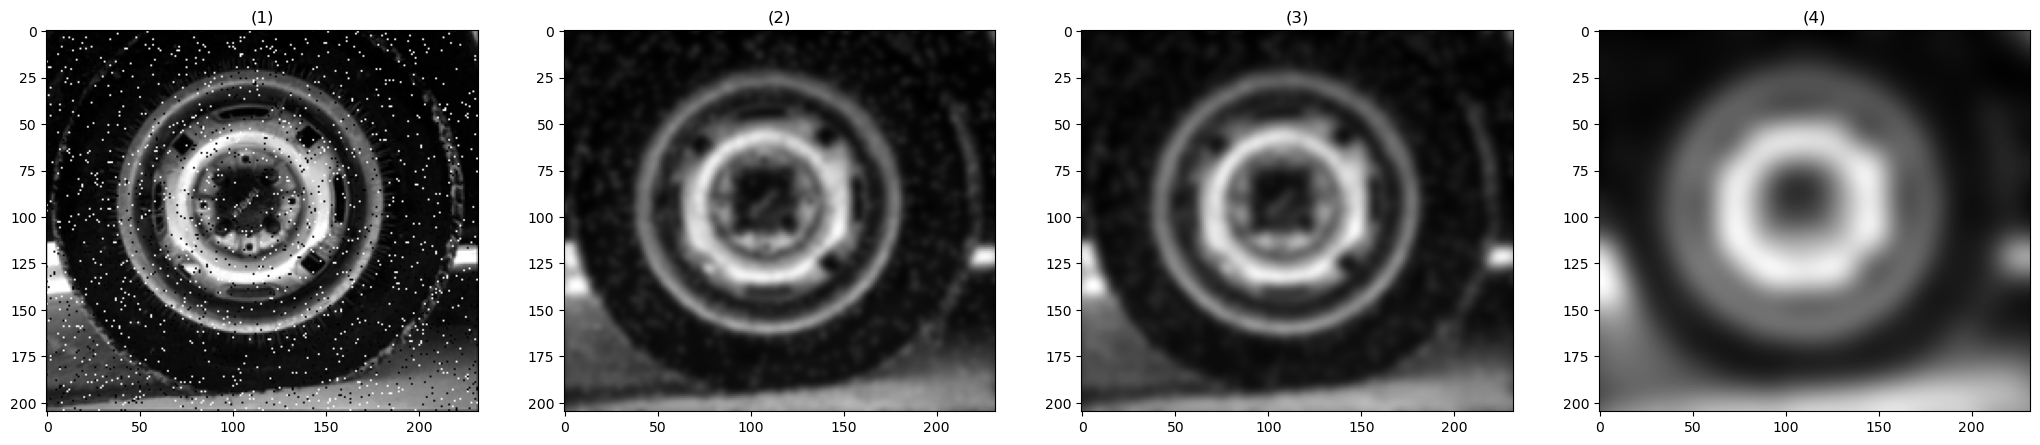

In [35]:
'''
(3) Gaussion Filters
'''
filtered_img3 = gaussian(noisy_img, sigma=0.2)
filtered_img4 = gaussian(noisy_img, sigma=1.9)
filtered_img5 = gaussian(noisy_img, sigma=2.6)
filtered_img6 = gaussian(noisy_img, sigma=8)

show_images([filtered_img3, filtered_img4, filtered_img5, filtered_img6])